## DO NOT TOUCH THIS MASTER VERSION OF THE NOTEBOOK. Create a duplicate notebook with your own copy name (e.g. marcelo_segmentador.ipynb) for your own usage

# Nuclear Game (NG) - Segmentation
NG - Nuclear Segmentation and Feature Measurement Notebook

### Import modules

In [1]:
import ngtools.segmentation as ngt
import matplotlib.pyplot as plt

### Path to files
Enter path to folder where files are.

In [8]:
path = "/Users/m./Downloads/Images for Marcelo/Week 0/"

## Start Nuclear Game - Segmentation

In [9]:
ngs = ngt.Segmentador(path, outdir = None, analyse_all=False)

Analyse all (2) .tif files or select one (all/one)? ALL


<tifffile.TiffFile 'Week_0_G1-H3_1_M…-Site_1.ome.tif'> OME series is BinaryOnly, not an OME-TIFF master file 
<tifffile.TiffFile 'Week_0_G1-H3_1_M…-Site_0.ome.tif'> OME series is BinaryOnly, not an OME-TIFF master file 


Files imported:
	Week_0_G1-H3_1_MMStack_G3-Site_1.ome (format: .TIF)
	Week_0_G1-H3_1_MMStack_H2-Site_0.ome (format: .TIF)
Enter resolution for X axis (micrometer/pixel): 1
Enter resolution for Y axis (micrometer/pixel): 1


### Identify channels

Channels: DAPI, Beta3, RFP, Ngn

In [10]:
ngs.set_channels()

Insert name of marker in channel 0: DAPI
Insert name of marker in channel 1: Nf1a
Insert name of marker in channel 2: vim

Which marker is the DNA marker (nuclear staining) (DAPI/Nf1a/vim)? DAPI


### Perform nuclear segmentation
Nuclear segmentation is performed by using either Cellpose or DeepCell. For Cellpose, diameter (optional) is the estimated average size of the nuclear diameter in pixels. If NONE is given, then it will calculate one, however, this process takes longer.

In [11]:
ngs.nuclear_segmentation(method = "cellpose", diameter = 30, gamma_corr = 0.25, dc_scaleCorr = 1.9,
                         GPU = True)


Performing segmentation on file 1 of 2 


Performing segmentation on file 2 of 2 



### Show nuclear segmentation (optional)

Print names of files.

In [12]:
ngs.print_files()

Week_0_G1-H3_1_MMStack_G3-Site_1.ome
Week_0_G1-H3_1_MMStack_H2-Site_0.ome


Show nuclear segmentation of one of the files.

  0%|                                                     | 0/2 [00:00<?, ?it/s]

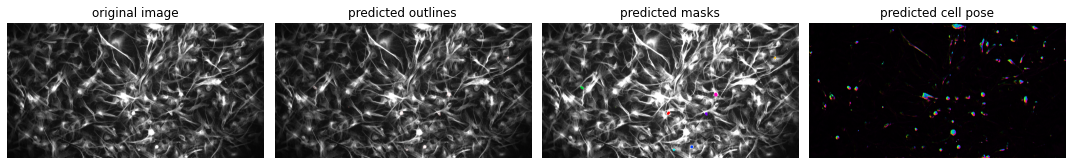

 50%|██████████████████████▌                      | 1/2 [00:05<00:05,  5.42s/it]

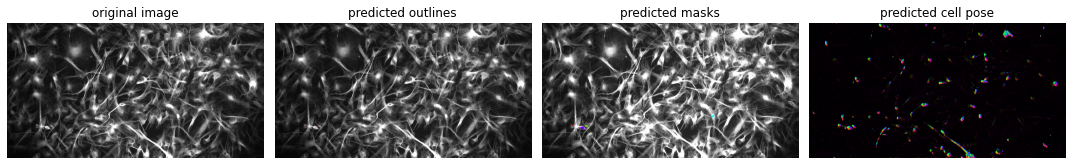

100%|█████████████████████████████████████████████| 2/2 [00:10<00:00,  5.32s/it]


In [13]:
from tqdm import tqdm
import os

#os.mkdir(f"{ngs.path_save}figures/")

for f in tqdm(ngs.data["files"]):
    fig = ngs.show_segmentation(file = f)
    #fig.savefig(f"{ngs.path_save}figures/{f}_masks.pdf", dpi = 300)
    #plt.close()
    plt.show()

### Measure first pool of nuclear features

In [ ]:
ngs.nuclear_features()

### Show distribution of nuclear features (optional)

Print the names of the features that we have measured so far...

In [ ]:
ngs.print_features()

We can plot any of the features measured by changing the parameter 'feature'.

In [ ]:
fig = ngs.plot_boxplot_hist(feature = "nuclear_area")
fig.show()

### Measure additional nuclear features

Measure additional features. These can only be measured if the first pool has already been measured.

In [ ]:
ngs.add_nuclear_features()

Measure DNA dots and DNA peaks. This is an additional nuclear feature, whose measurement takes time. This feature finds the number of high intensity DNA dots in each nucleus.

In [ ]:
ngs.find_dna_peaks(box_size = 10, zoom_box_size = 200)
ngs.find_dna_dots(zoom_box_size = 200)

Measure Leibovici's Spatial Entropy. This is an additional nuclear feature, whose measurement takes time. This feature calculates the spatial entropy of each nucleus using the Leibovici method. 

In [ ]:
ngs.spatial_entropy(d = 5, zoom_box_size = 200)

Print nuclear features measured:

In [ ]:
ngs.print_features()

### Identify cells positive to the markers

Another option is to use several thresholds and assign classes according to marker intensity:

In [ ]:
ngs.markerGroup(n_groups = 5)

### Save data and channel information for further NG analysis

In [ ]:
ngs.saveArrays()
ngs.saveChannelInfo()

### Export nuclear features measured as CSV

In [ ]:
ngs.export_csv(filename = "outputD3.csv")